In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import pickle
import itertools
import matplotlib as mpl
import seaborn as sns

mpl.rcParams.update({
    'font.size'           : 18.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'medium',
})

In [6]:
with open('transfer_model_eval_cm.txt', 'rb') as f:
    cm_xc_model = pickle.load(f)
class_names = ['Biological', 'Fibres', 'Films_Coated_Surface', 'MEMS_devices_and_electrodes', 'Nanowires', 'Particles', 'Patterned_surface', 'Porous_Sponge', 'Powder', 'Tips']

In [112]:
cm_xc_model

array([[152,   0,   0,   0,   9,   9,   6,   0,   0,   3],
       [  1,  13,   0,   5,  18,   0,   1,   0,   0,   0],
       [ 16,   0,   0,   3,  13,  18,  12,   0,   0,   3],
       [  5,   0,   0, 680,  22,  14, 160,   1,   0,  23],
       [ 16,   0,   0,  19, 613,  47,  16,   0,   1,  19],
       [ 10,   0,   0,  14,  21, 669,  39,   0,   2,  11],
       [  2,   0,   0,  55,  10,  27, 810,   0,   2,  23],
       [  2,   0,   0,   1,   4,   9,   5,   9,   1,   3],
       [ 45,   0,   0,   2,  20,  55,  11,   1,  55,   0],
       [  5,   0,   0,   9,   9,  12,  17,   0,   0, 279]])

In [13]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix for xception model',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #print(len(classes))
    ax.set_title(title)
    plt.colorbar(ax=ax)

    plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    
    plt.savefig('img/confusion_xc_model.png',bbox_inches = "tight")
    

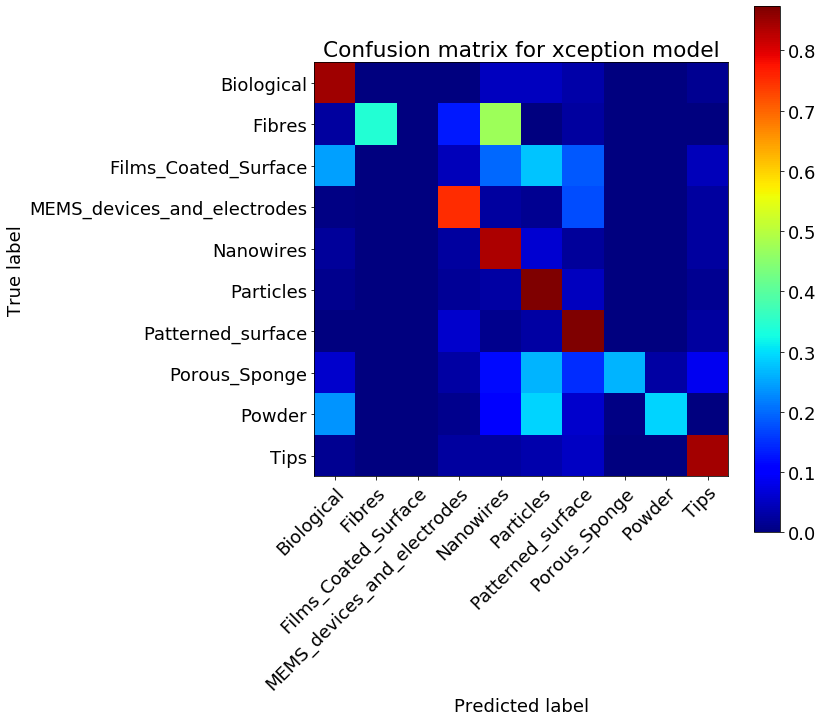

In [14]:
plot_confusion_matrix(cm_xc_model, class_names)

In [49]:
xc_validation_accuracy = pd.read_csv('run-validation-tag-epoch_accuracy.csv')
xc_validation_loss = pd.read_csv('run-validation-tag-epoch_loss.csv')

xc_train_accuracy = pd.read_csv('run-train-tag-epoch_accuracy.csv')
xc_train_loss = pd.read_csv('run-train-tag-epoch_loss.csv')

In [52]:
xc_validation_accuracy.drop('Wall time',axis=1, inplace=True)
xc_validation_accuracy = xc_validation_accuracy.rename(columns={'Value': 'Validation_accuracy'})
xc_validation_accuracy.set_index('Step',inplace=True)

In [53]:
xc_validation_accuracy

,Validation_accuracy
Step,
0,0.783537
1,0.807055
2,0.813535
3,0.828414
4,0.836573


In [50]:
xc_train_accuracy.drop('Wall time',axis=1, inplace=True)
xc_train_accuracy = xc_train_accuracy.rename(columns={'Value': 'train_accuracy'})
xc_train_accuracy.set_index('Step',inplace=True)

In [51]:
xc_train_accuracy

,train_accuracy
Step,
0,0.716128
1,0.788616
2,0.807656
3,0.814872
4,0.823089


In [54]:
xc_validation_loss.drop('Wall time',axis=1, inplace=True)
xc_validation_loss = xc_validation_loss.rename(columns={'Value': 'validation_loss'})
xc_validation_loss.set_index('Step',inplace=True)

In [55]:
xc_validation_loss

,validation_loss
Step,
0,0.672832
1,0.611280
2,0.579597
3,0.552621
4,0.532275


In [56]:
xc_train_loss.drop('Wall time',axis=1, inplace=True)
xc_train_loss = xc_train_loss.rename(columns={'Value': 'train_loss'})
xc_train_loss.set_index('Step',inplace=True)

In [57]:
xc_train_loss

,train_loss
Step,
0,0.862572
1,0.635141
2,0.584137
3,0.558417
4,0.533435


In [58]:
xc_metrics=xc_train_accuracy.join([xc_validation_accuracy,xc_train_loss,xc_validation_loss])

In [60]:
xc_metrics.to_csv('logs/xc_metrics')

In [62]:
xc_metrics

,train_accuracy,Validation_accuracy,train_loss,validation_loss
Step,,,,
0,0.716128,0.783537,0.862572,0.672832
1,0.788616,0.807055,0.635141,0.611280
2,0.807656,0.813535,0.584137,0.579597
3,0.814872,0.828414,0.558417,0.552621
4,0.823089,0.836573,0.533435,0.532275


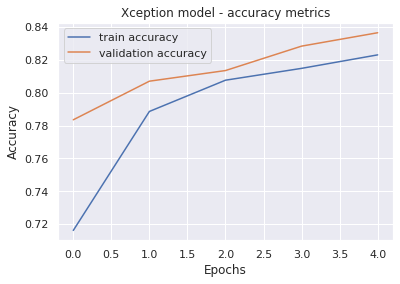

In [108]:
fig,ax = plt.subplots(sharey=True)

ax.plot([0,1,2,3,4],xc_metrics[['train_accuracy','Validation_accuracy']])

ax.set_title('Xception model - accuracy metrics')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
ax.legend(labels=['train accuracy','validation accuracy'])

plt.savefig('img/accuracy_xc_model.png',bbox_inches = "tight")

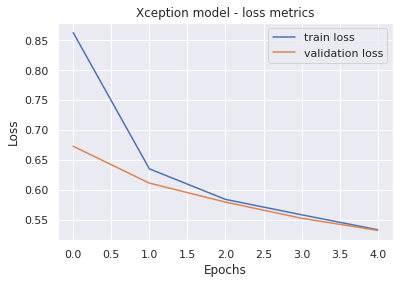

In [109]:
fig,ax = plt.subplots(sharey=True)

ax.plot([0,1,2,3,4],xc_metrics[['train_loss','validation_loss']])

ax.set_title('Xception model - loss metrics')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
ax.legend(labels=['train loss','validation loss'])

plt.savefig('img/loss_xc_model.png',bbox_inches = "tight")

In [114]:
#normalize confusion matrix
norm = np.linalg.norm(cm_xc_model)
normal_cm_xc_model = cm_xc_model/norm
print(normal_cm_xc_model)

[[0.10511784 0.         0.         0.         0.00622408 0.00622408
  0.00414939 0.         0.         0.00207469]
 [0.00069156 0.00899034 0.         0.00345782 0.01244817 0.
  0.00069156 0.         0.         0.        ]
 [0.01106504 0.         0.         0.00207469 0.00899034 0.01244817
  0.00829878 0.         0.         0.00207469]
 [0.00345782 0.         0.         0.47026403 0.01521442 0.00968191
  0.11065036 0.00069156 0.         0.01590599]
 [0.01106504 0.         0.         0.01313973 0.42392919 0.03250354
  0.01106504 0.         0.00069156 0.01313973]
 [0.00691565 0.         0.         0.00968191 0.01452286 0.46265682
  0.02697103 0.         0.00138313 0.00760721]
 [0.00138313 0.         0.         0.03803606 0.00691565 0.01867225
  0.56016745 0.         0.00138313 0.01590599]
 [0.00138313 0.         0.         0.00069156 0.00276626 0.00622408
  0.00345782 0.00622408 0.00069156 0.00207469]
 [0.03112041 0.         0.         0.00138313 0.0138313  0.03803606
  0.00760721 0.00069

In [115]:
# find commonly confused labels

from heapq import nlargest
from collections import defaultdict

d = defaultdict(list)

for i in range(len(normal_cm_xc_model)):
    for j in range(i):
      d[normal_cm_xc_model[i][j]].append((i, j))

for value, positions in nlargest(5, d.items(), key=lambda item: item[0]):
    print (class_names[positions[0][0]] + " for " + class_names[positions[0][1]], f'{value*100:1f}%')

Patterned_surface for MEMS_devices_and_electrodes 3.803606%
Powder for Biological 3.112041%
Patterned_surface for Particles 1.867225%
Particles for Nanowires 1.452286%
Powder for Nanowires 1.383130%
